In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_excel('../data/gsw_box_score_team_stats.xlsx')

gsw_df = df[df['TEAM']=='GSW']
opponent_df = df[df['TEAM']!='GSW']

print(f'gsw_df.shape: {gsw_df.shape}\t\tgsw_df.TEAM.nunique(): {gsw_df.TEAM.nunique()}')
print(f'opponent_df.shape: {opponent_df.shape}\topponent_df.TEAM.nunique(): {opponent_df.TEAM.nunique()}')

gsw_df.shape: (67, 25)		gsw_df.TEAM.nunique(): 1
opponent_df.shape: (67, 25)	opponent_df.TEAM.nunique(): 29


In [3]:
JIMMY_TRADE = '2025-02-08'

gsw_df_pre_jimmy = gsw_df[gsw_df['DATE'] < JIMMY_TRADE]
gsw_df_with_jimmy = gsw_df[gsw_df['DATE'] >= JIMMY_TRADE]

opp_df_pre_jimmy = opponent_df[opponent_df['DATE'] < JIMMY_TRADE]
opp_df_with_jimmy = opponent_df[opponent_df['DATE'] >= JIMMY_TRADE]

In [ ]:
gsw_pts_avg_with_jimmy = round(gsw_df_with_jimmy.PTS.mean(), 2)
gsw_pts_avg_pre_jimmy = round(gsw_df_pre_jimmy.PTS.mean(), 2)
print(f"GSW PTS AVG with Jimmy: {gsw_pts_avg_with_jimmy}; GSW PTS AVG before Jimmy: {gsw_pts_avg_pre_jimmy}")

opp_pts_avg_with_jimmy = round(opp_df_with_jimmy.PTS.mean(), 2)
opp_pts_avg_pre_jimmy = round(opp_df_pre_jimmy.PTS.mean(), 2)
print(f"Opponents PTS AVG with Jimmy: {opp_pts_avg_with_jimmy}; Opponents PTS AVG before Jimmy: {opp_pts_avg_pre_jimmy}")

GSW PTS AVG with Jimmy: 120.06; GSW PTS AVG before Jimmy: 111.51
Opponents PTS AVG with Jimmy: 107.75; Opponents PTS AVG before Jimmy: 111.92


In [6]:
avg_columns = [
    'FGM', 'FGA','3PM', '3PA', 'FTM', 'FTA', 'OREB', 'DREB',
    'TREB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', '+/-']

gsw_df_pre_jimmy_avg = pd.DataFrame(gsw_df_pre_jimmy[avg_columns].mean()).transpose()
gsw_df_with_jimmy_avg = pd.DataFrame(gsw_df_with_jimmy[avg_columns].mean()).transpose()

In [7]:
gsw_avg_combined_df = pd.concat([gsw_df_pre_jimmy_avg, gsw_df_with_jimmy_avg], axis=0)
gsw_avg_combined_df

,FGM,FGA,3PM,3PA,FTM,FTA,OREB,DREB,TREB,AST,STL,BLK,TOV,PF,PTS,+/-
0,40.705882,91.627451,15.411765,42.549020,14.686275,20.392157,12.607843,33.392157,46.000000,28.607843,8.607843,4.980392,13.254902,19.568627,111.509804,-0.411765
0,42.153846,91.307692,14.307692,41.615385,21.692308,25.538462,13.692308,32.461538,46.153846,31.153846,10.153846,5.000000,12.307692,19.692308,120.307692,12.153846


In [8]:
opp_df_pre_jimmy_avg = pd.DataFrame(opp_df_pre_jimmy[avg_columns].mean()).transpose()
opp_df_with_jimmy_avg = pd.DataFrame(opp_df_with_jimmy[avg_columns].mean()).transpose()

opp_avg_combined_df = pd.concat([opp_df_pre_jimmy_avg, opp_df_with_jimmy_avg], axis=0)
opp_avg_combined_df['Descr']=['before','after']

In [9]:
opp_avg_combined_df


,FGM,FGA,3PM,3PA,FTM,FTA,OREB,DREB,TREB,AST,STL,BLK,TOV,PF,PTS,+/-,Descr
0,40.803922,88.215686,13.352941,37.352941,16.960784,21.784314,10.549020,34.647059,45.196078,26.549020,7.549020,5.862745,13.725490,17.784314,111.921569,0.411765,before
0,39.384615,85.307692,12.153846,33.692308,17.230769,23.153846,10.692308,30.846154,41.538462,22.846154,7.230769,4.538462,17.461538,20.461538,108.153846,-12.153846,after


<Axes: xlabel='DATE'>

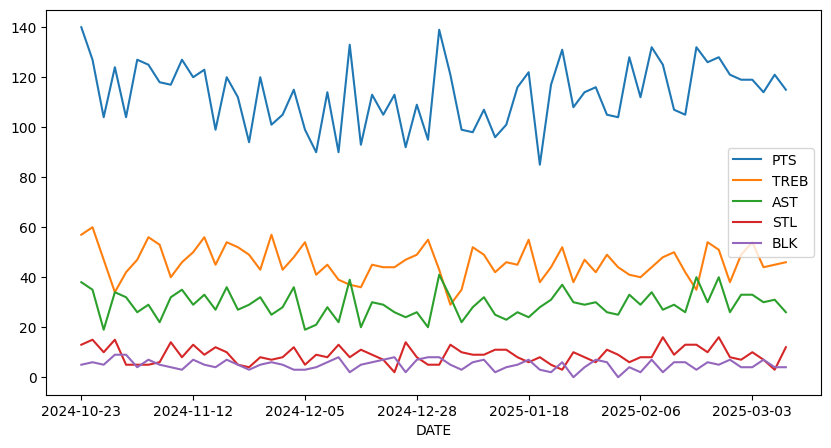

In [ ]:
import numpy as np

# ts = pd.DataFrame(gsw_df_pre_jimmy.PTS, index=gsw_df_pre_jimmy.DATE)
# ts
ts = gsw_df#.cumsum()
ts.plot(y=['PTS','TREB', 'AST', 'STL', 'BLK'], x='DATE', kind='line', figsize=(10,5))